# Inspect training data (spectrograms)

## Preliminaries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import time

import numpy as np
import h5py
import librosa

from matplotlib import mlab
from matplotlib import gridspec
from scipy.interpolate import interp1d

from plottools import force_aspect, plot_spectrogram_label, create_weights

## Read in the training sample

In [6]:
# Path to the directory where all data is stored
data_path = '../data'

# Read in the HDF file
with h5py.File(os.path.join(data_path, 'training', 'spectrograms', 'samples_spectrograms_0100_0300_256.h5')) as file:
    spectrograms = np.array(file['spectrograms'])
    labels = np.array(file['labels'])
    chirpmasses = np.array(file['chirpmasses'])
    distances = np.array(file['distances'])

-15.4256058493
53.2060685817
H1: 22.6148094356 ± 4.54848909364
L1: 22.033694096 ± 5.79186570525


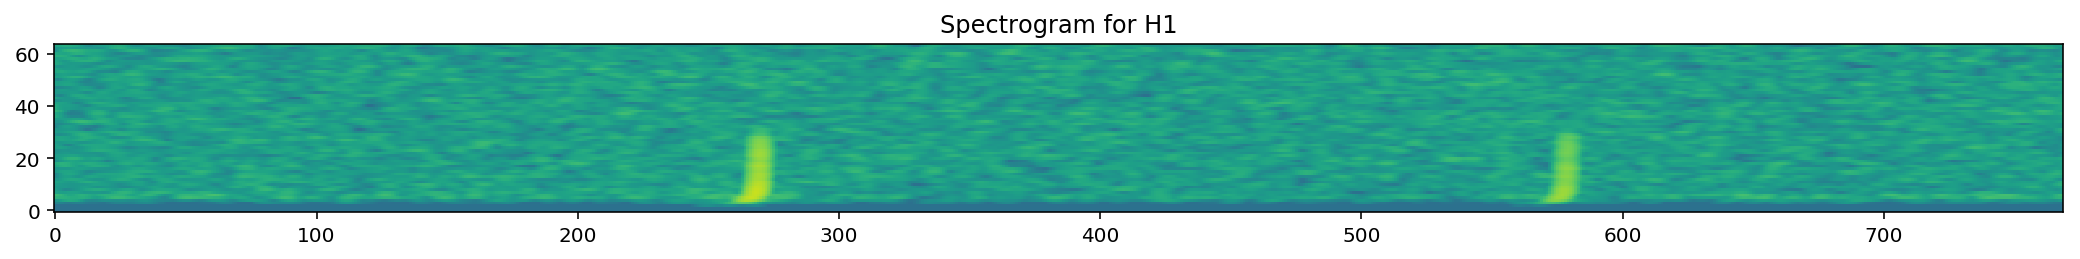

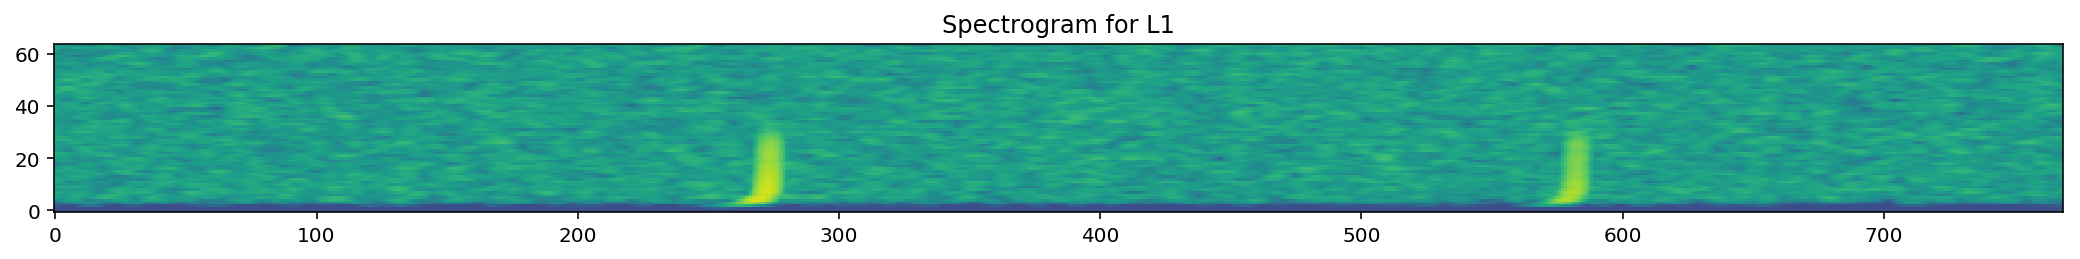

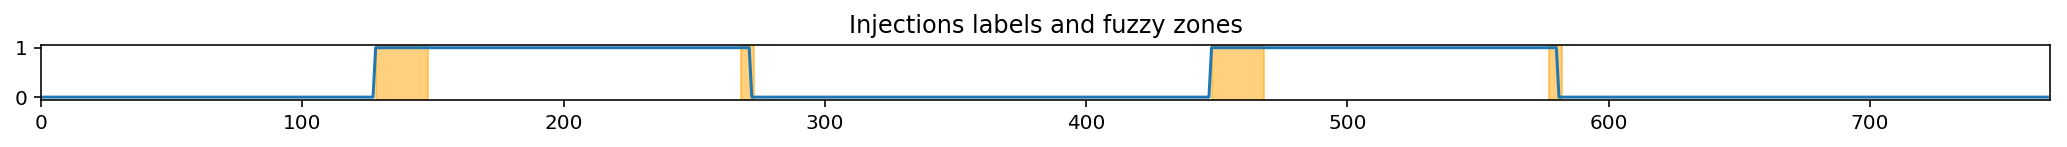

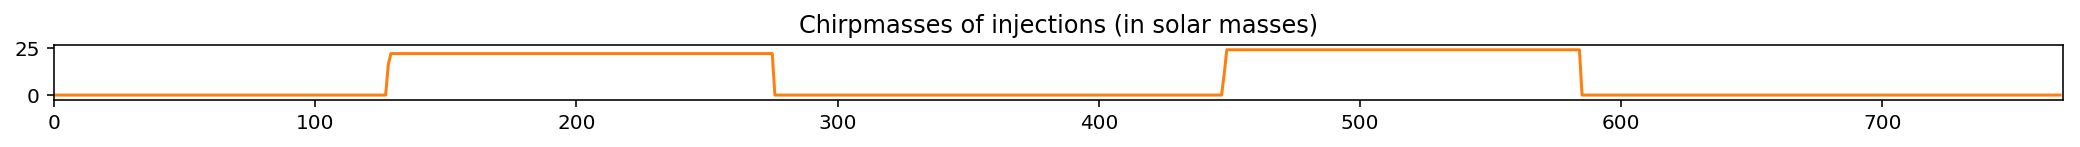

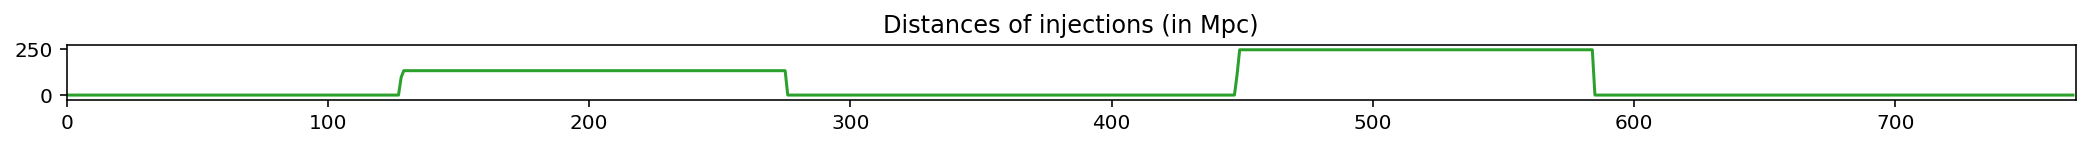

---------------------------------------------------------------------------------------------------------------------
H1: 23.0231958562 ± 4.15753384874
L1: 22.3067737637 ± 5.45277665749


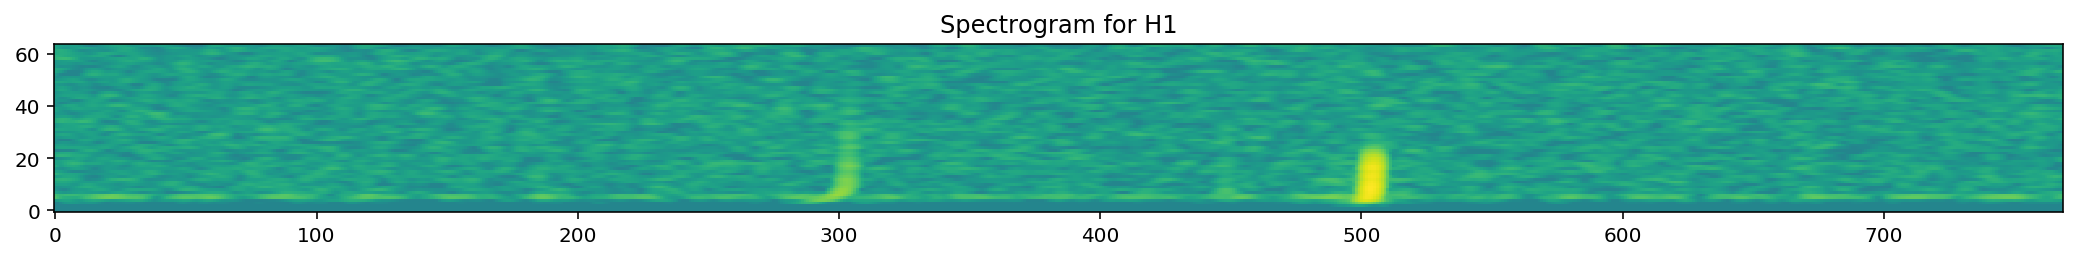

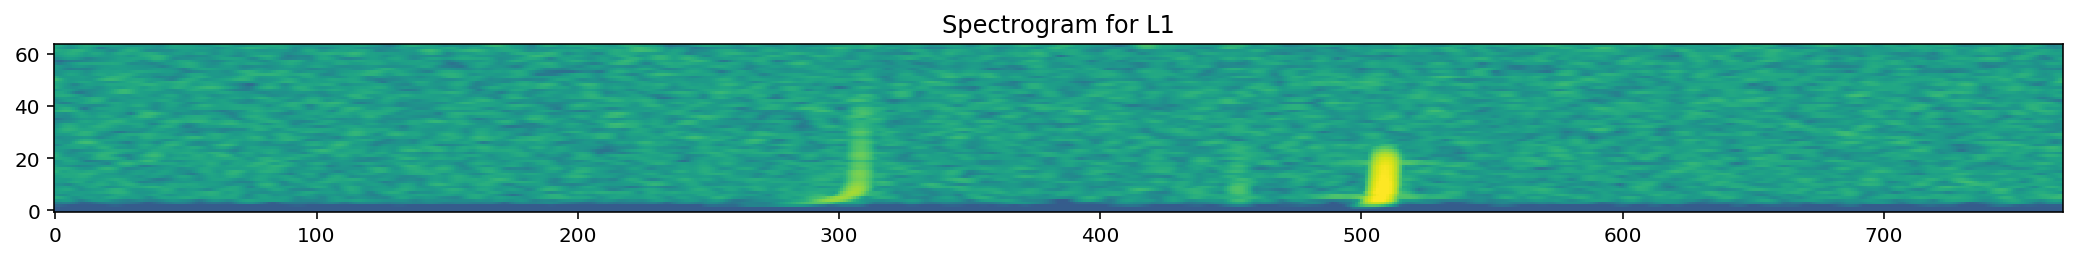

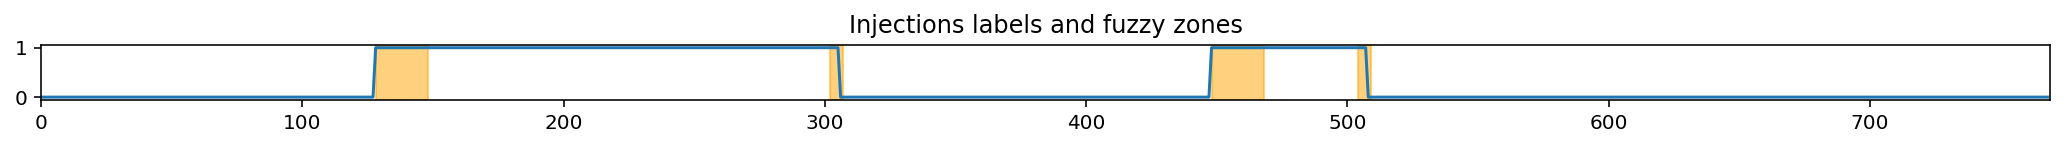

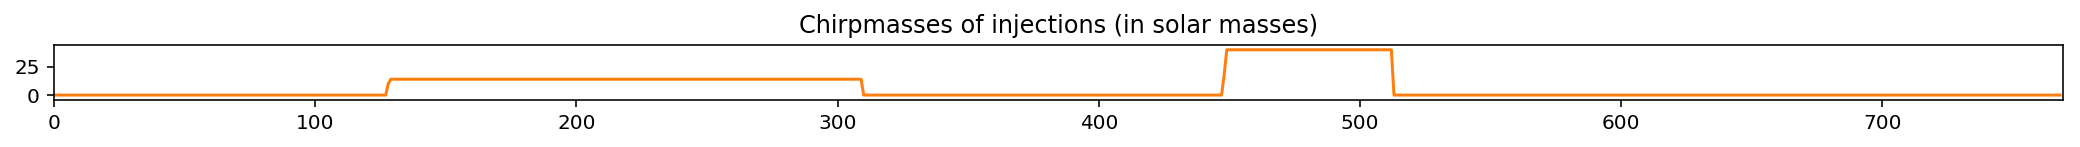

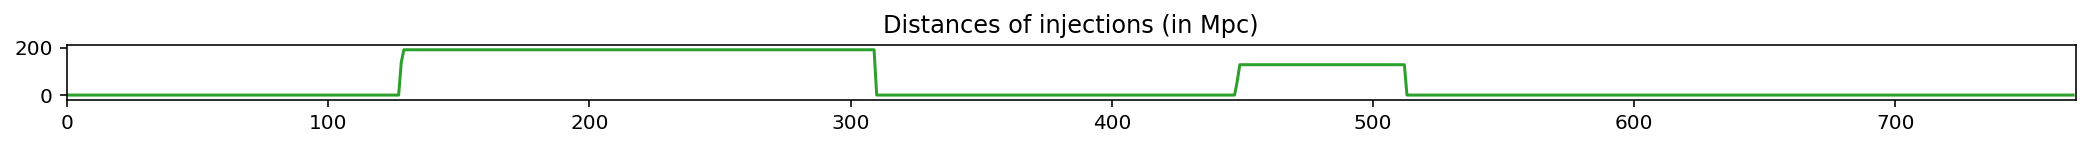

---------------------------------------------------------------------------------------------------------------------
H1: 22.8863325252 ± 3.77893998395
L1: 22.3767596206 ± 4.4649720177


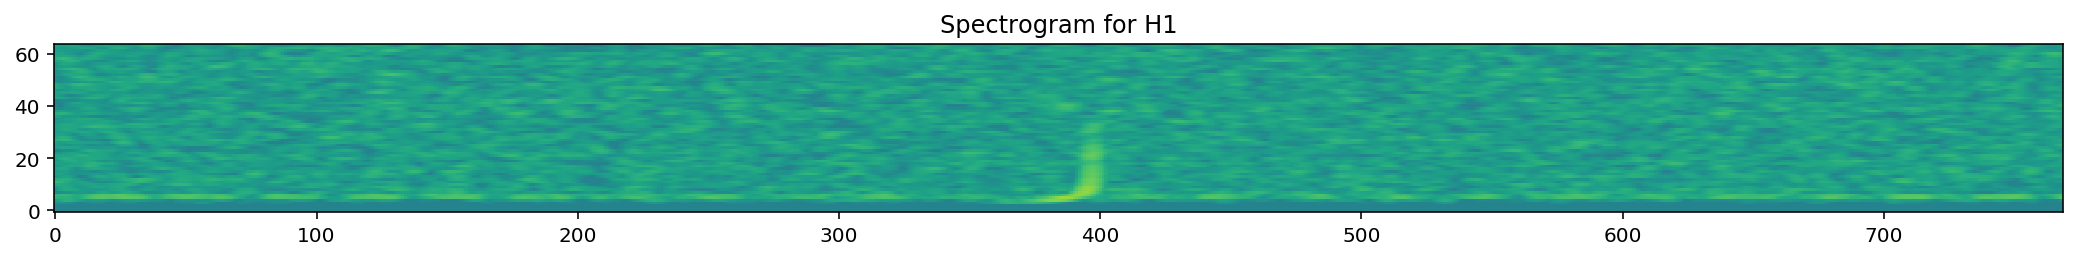

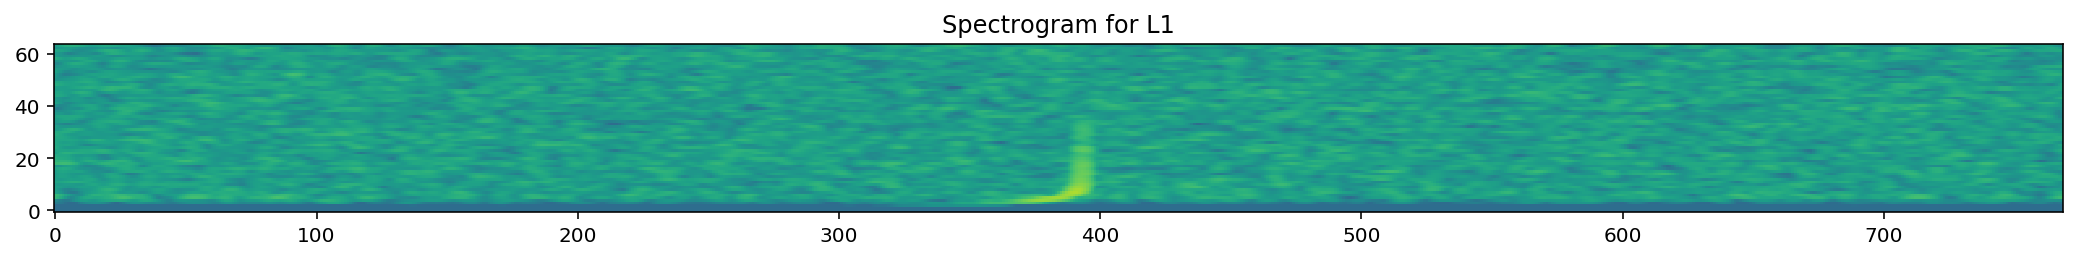

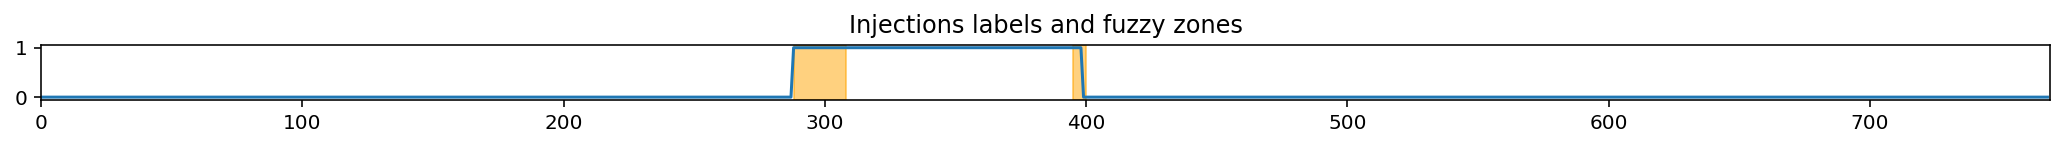

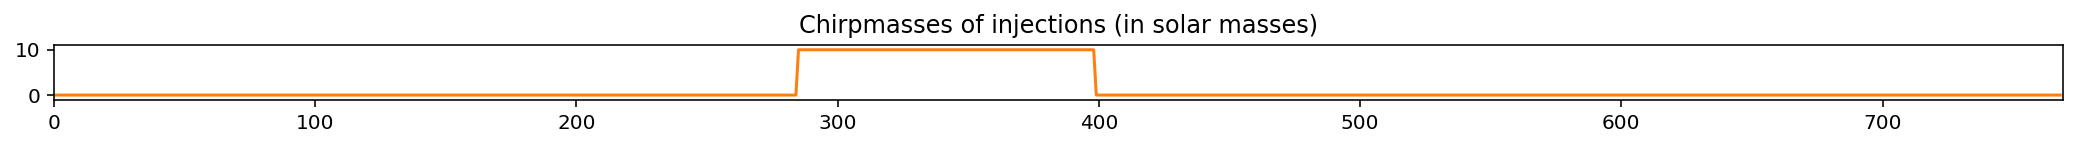

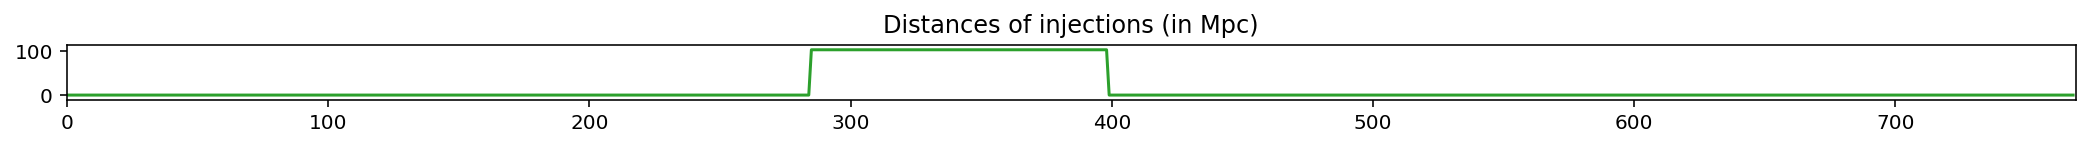

---------------------------------------------------------------------------------------------------------------------
H1: 22.7862089109 ± 3.67616678713
L1: 22.1195601193 ± 4.80238976777


/lustre/home/tgebhard/tf-1.0.0_gpu/lib/python3.5/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


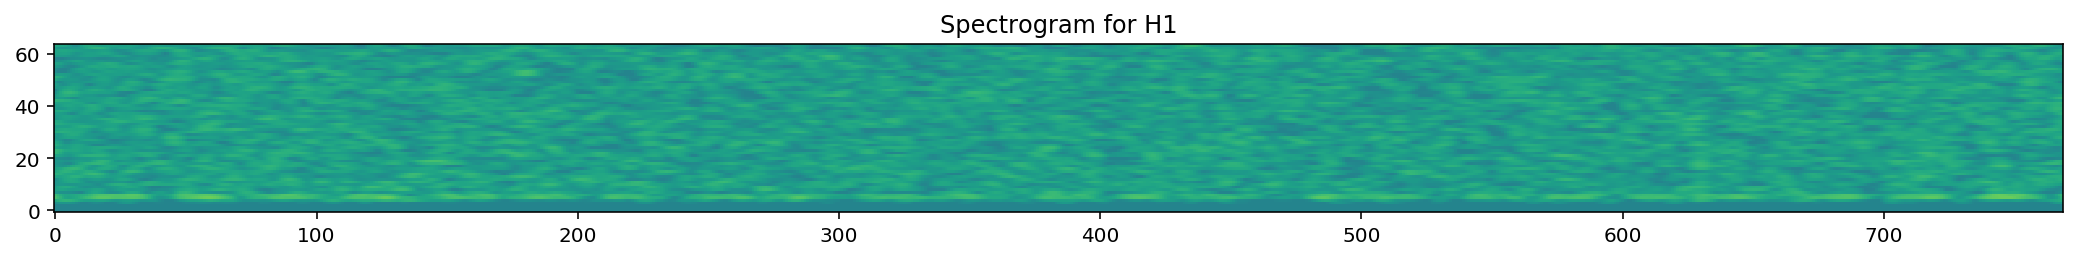

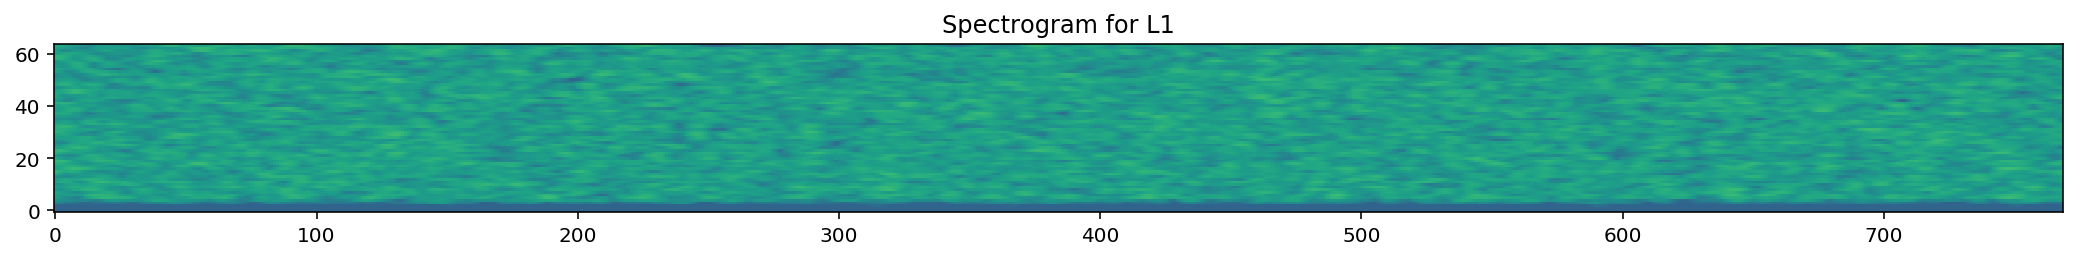

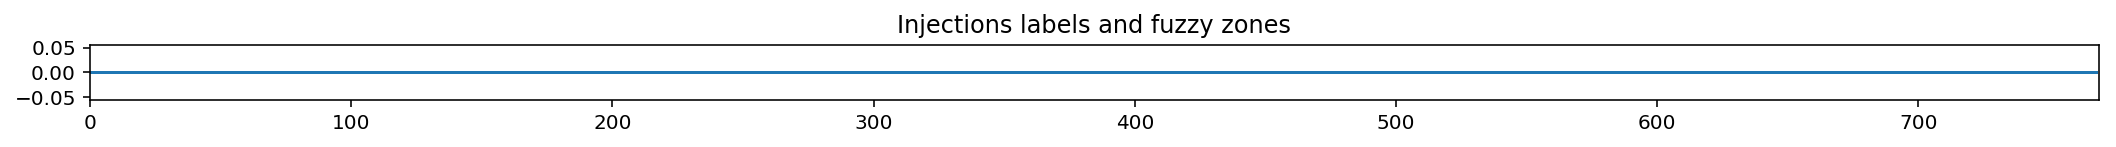

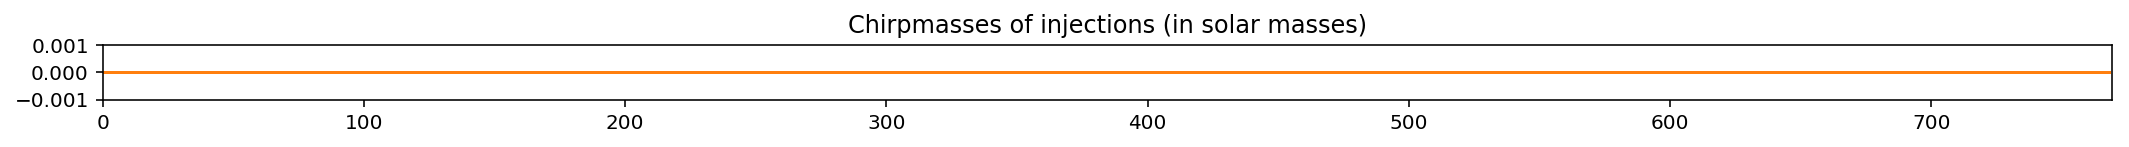

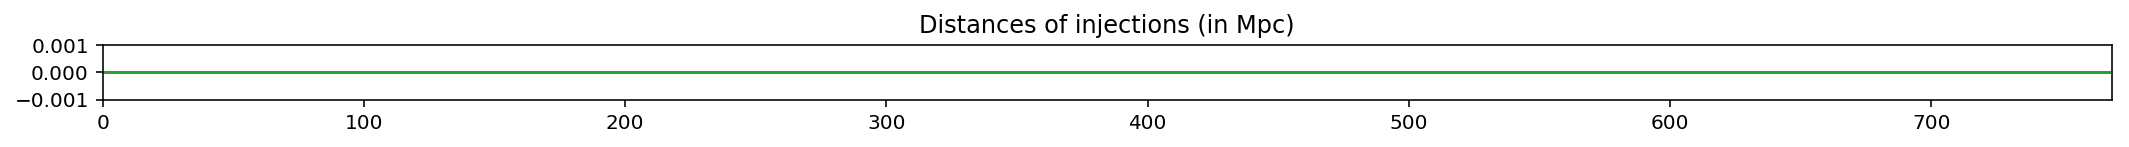

---------------------------------------------------------------------------------------------------------------------
H1: 22.8999881412 ± 4.0231212665
L1: 22.3383088449 ± 4.97233543583


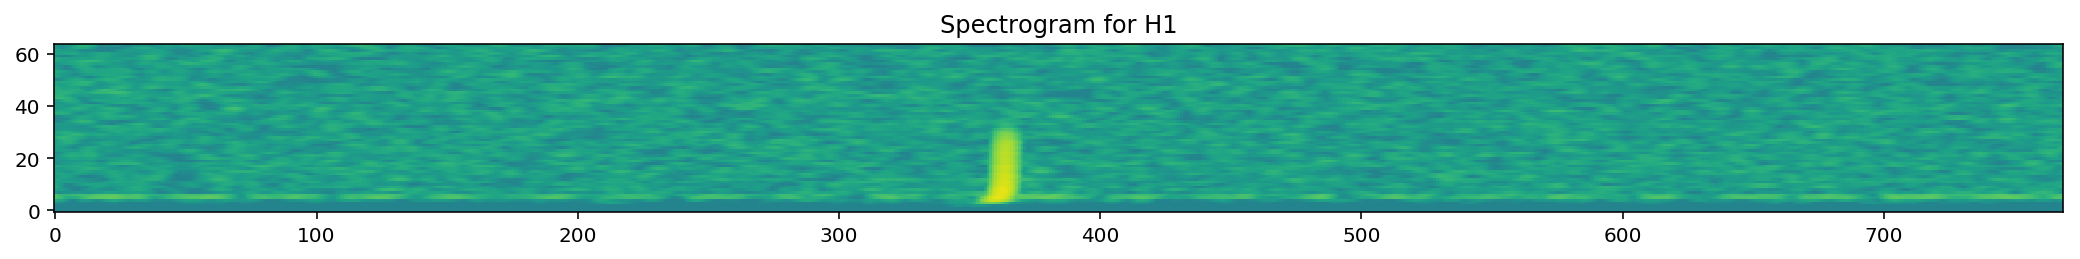

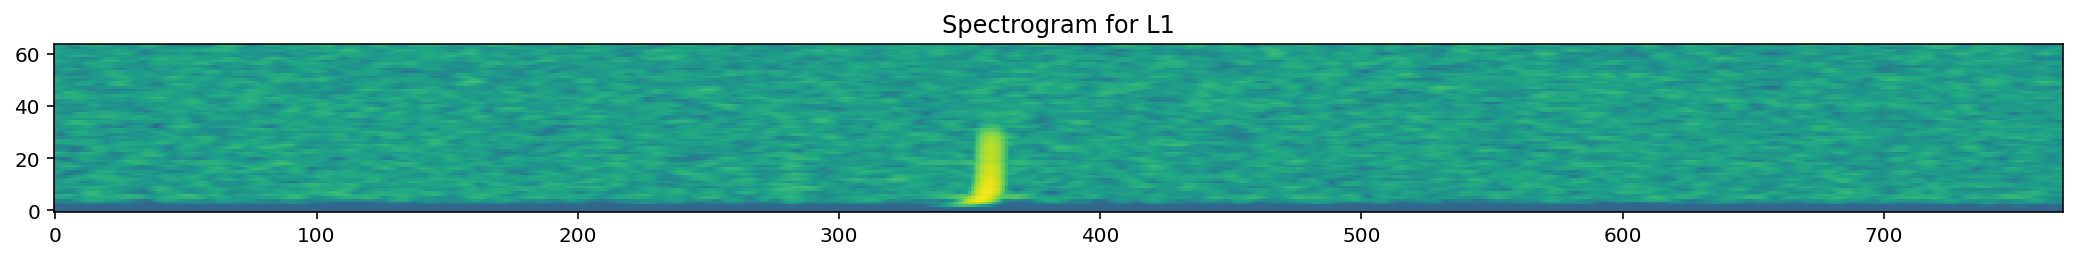

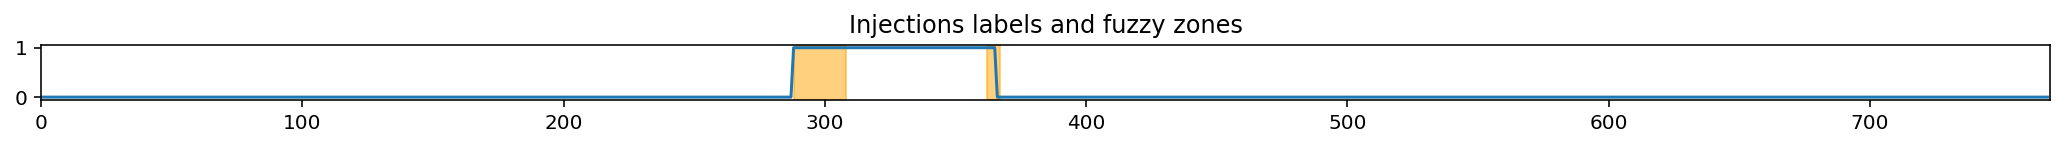

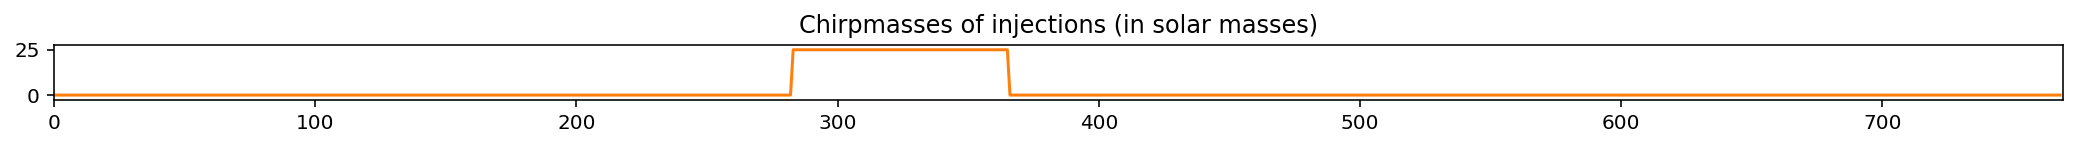

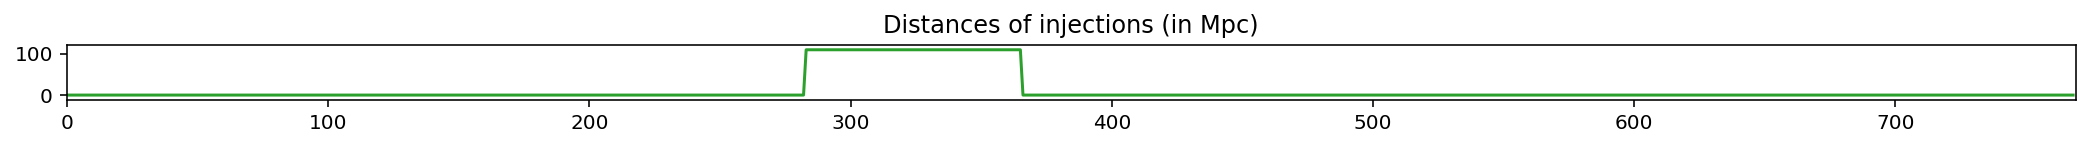

---------------------------------------------------------------------------------------------------------------------
H1: 23.1291333486 ± 3.80748384699
L1: 22.3042950218 ± 5.04621683313


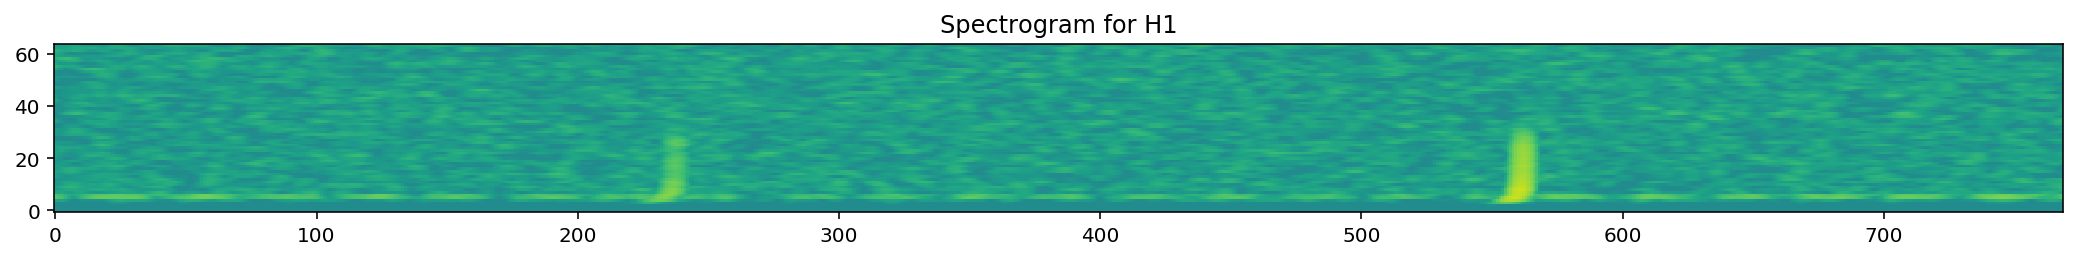

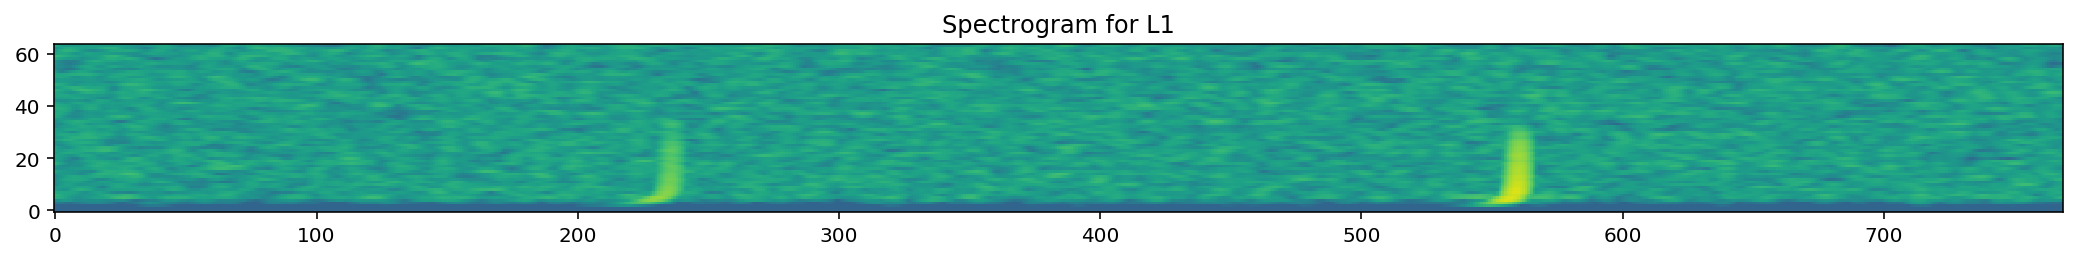

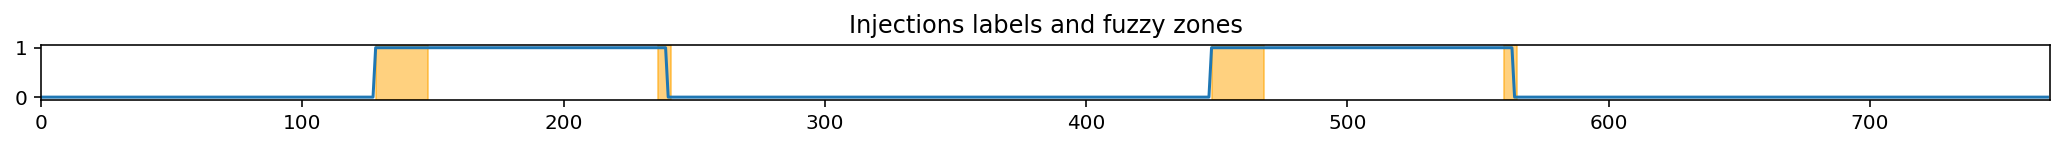

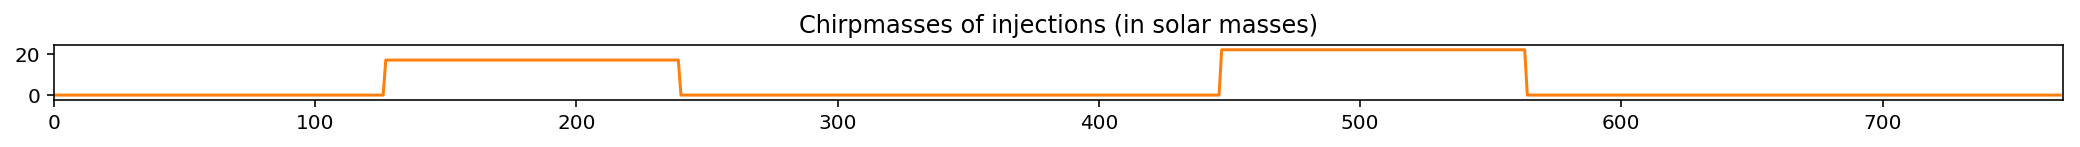

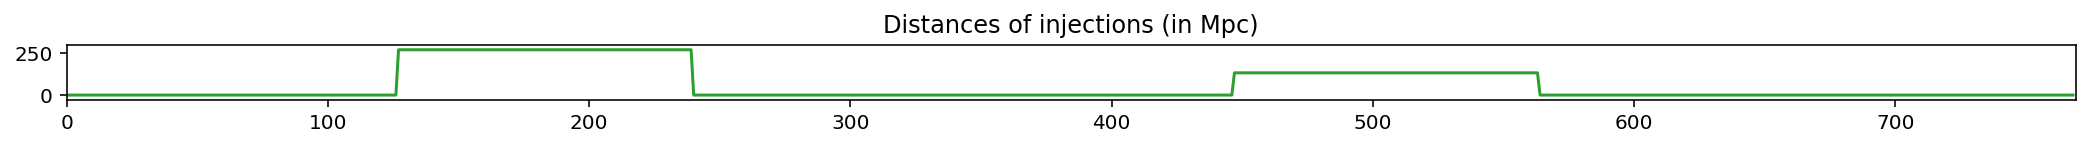

---------------------------------------------------------------------------------------------------------------------
H1: 22.3540470505 ± 4.55052258297
L1: 21.4347921997 ± 7.31108722484


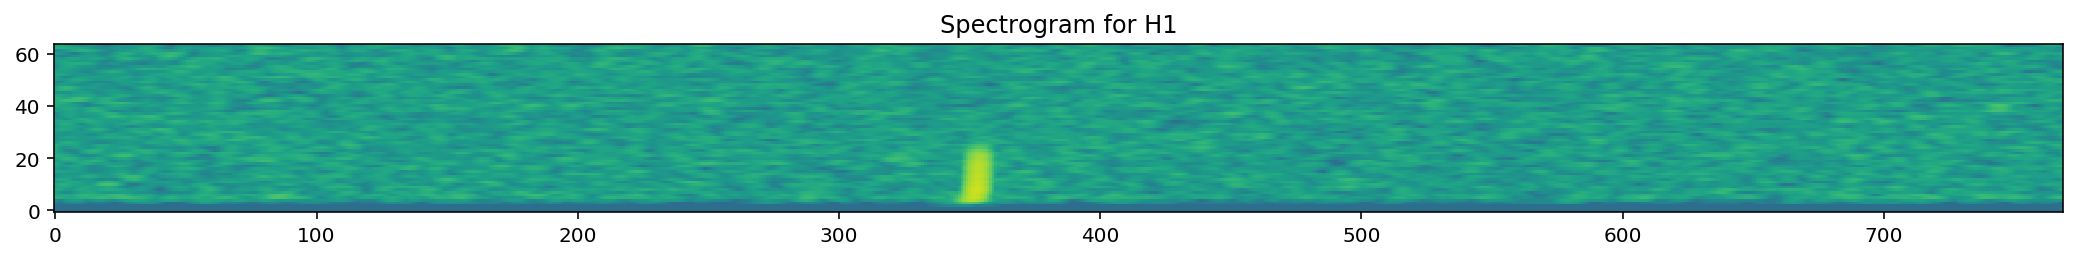

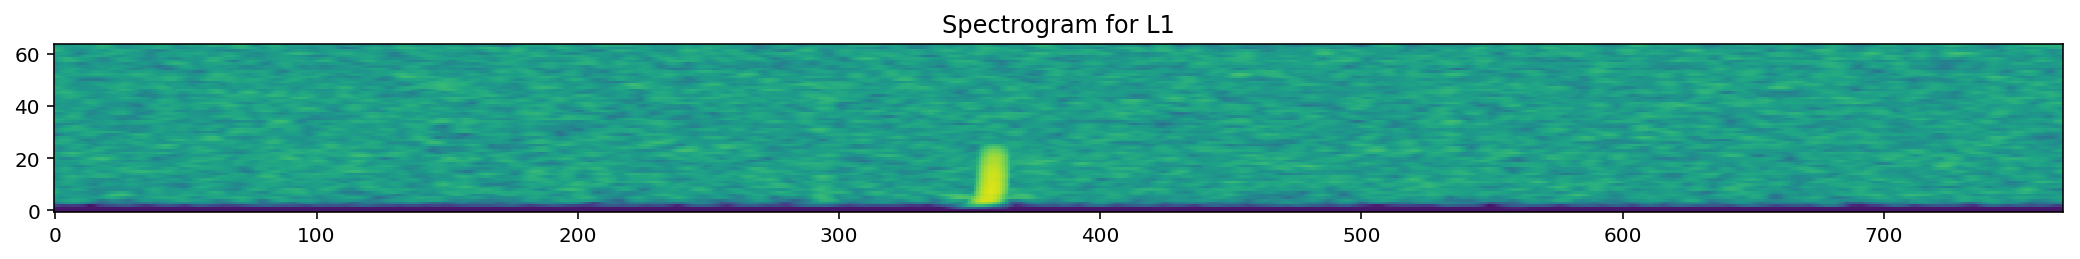

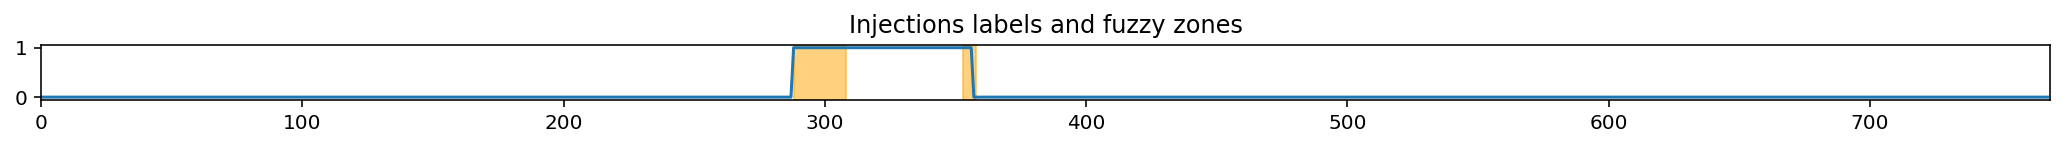

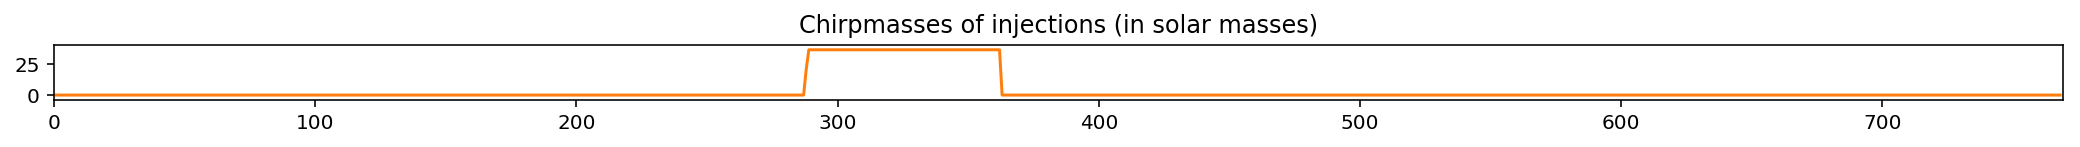

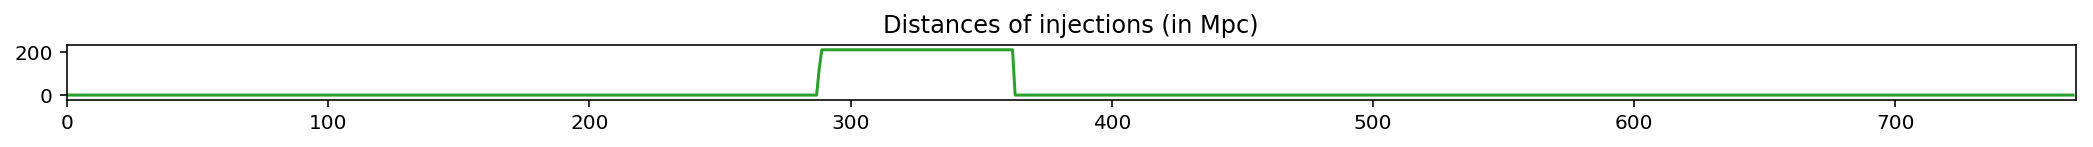

---------------------------------------------------------------------------------------------------------------------
H1: 23.0147269382 ± 3.66922377846
L1: 22.9811076043 ± 3.80838323911


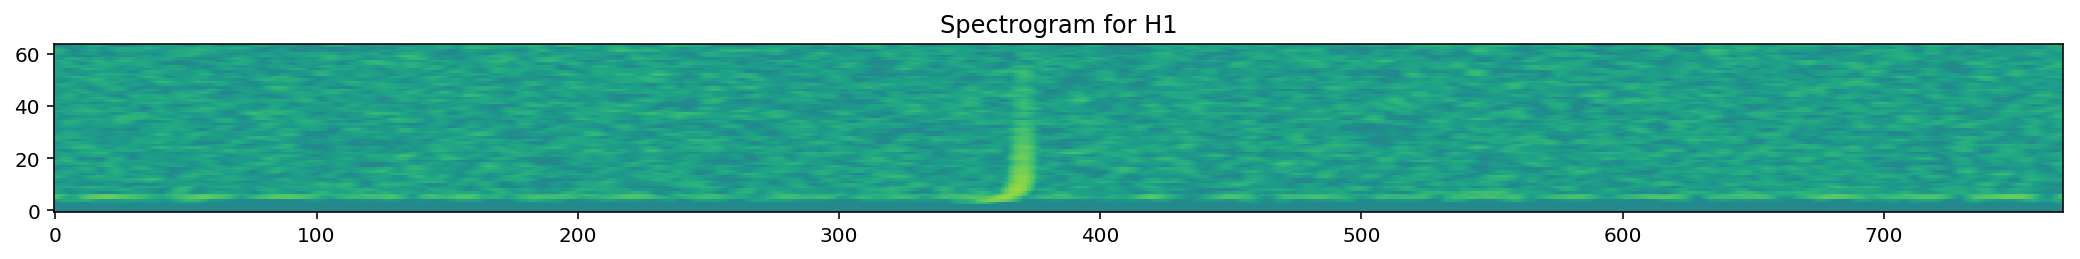

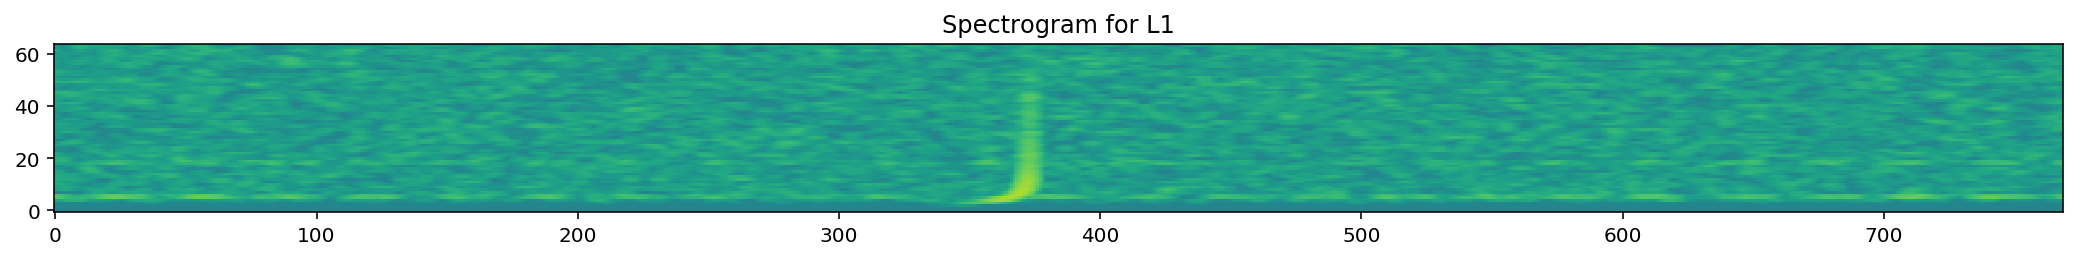

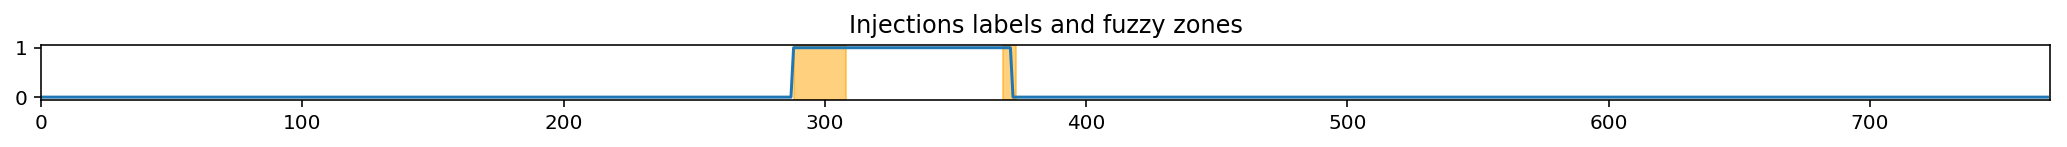

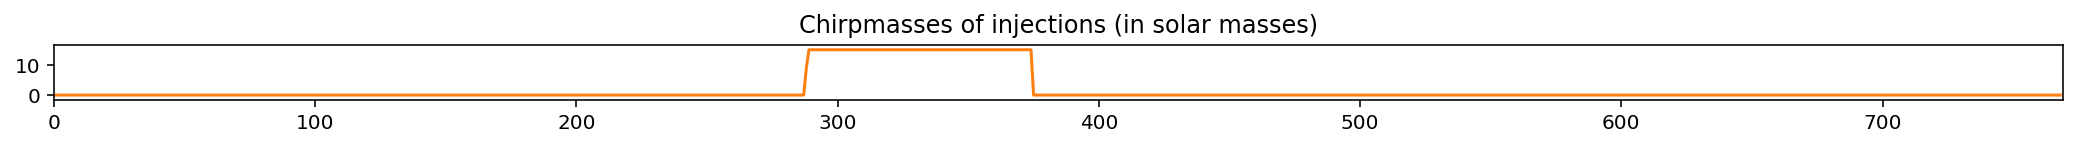

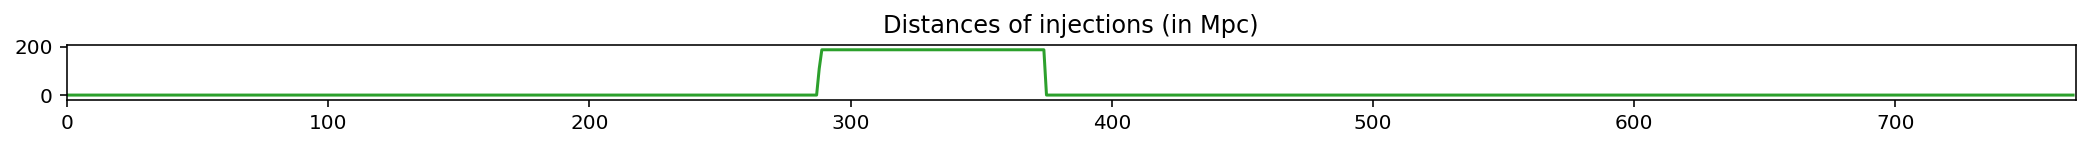

---------------------------------------------------------------------------------------------------------------------


In [7]:
minimum, maximum = np.min(spectrograms[:, :, :, 0]), np.max(spectrograms[:, :, :, 0])

print(minimum)
print(maximum)

for i in range(8):
    
    spectrogram = spectrograms[i]
    label = labels[i]
    chirpmass = chirpmasses[i]
    distance = distances[i]
    
    plt.figure(1)
    print('H1:', np.mean(spectrogram[:, :, 0]), '±', np.std(spectrogram[:, :, 0]))
    plt.gcf().set_size_inches(18, 6, forward=True)
    plt.title('Spectrogram for H1')
    plt.imshow(spectrogram[:, :, 0], origin="lower", vmin=minimum, vmax=maximum)
    
    plt.figure(2)
    print('L1:', np.mean(spectrogram[:, :, 1]), '±', np.std(spectrogram[:, :, 1]))
    plt.gcf().set_size_inches(18, 6, forward=True)
    plt.title('Spectrogram for L1')
    plt.imshow(spectrogram[:, :, 1], origin="lower", vmin=minimum, vmax=maximum)
    
    plt.figure(3)
    plt.gcf().set_size_inches(18, 0.5, forward=True)
    plt.title('Injections labels and fuzzy zones')
    plt.xlim(0, 769)
    # plt.ylim(-0.1, 1.1)
    plt.plot(label, color='C0')
    
    # Plot the fuzzy zones
    start = None
    in_zone = False
    fuzzy_zones = create_weights(label, start_size=20, end_size=5)
    for i in range(len(fuzzy_zones)):
        if not in_zone:
            if fuzzy_zones[i] == 0:
                start = i
                in_zone = True
        if in_zone:
            if fuzzy_zones[i] == 1:
                plt.axvspan(start, i, alpha=0.5, color='Orange')
                in_zone = False
    
    
    plt.figure(4)
    plt.gcf().set_size_inches(18, 0.5, forward=True)
    plt.title('Chirpmasses of injections (in solar masses)')
    plt.xlim(0, 769)
    plt.ylim(np.min(chirpmass)-0.1*np.max(chirpmass), 1.1*np.max(chirpmass))
    plt.plot(chirpmass, color='C1')
    
    plt.figure(5)
    plt.gcf().set_size_inches(18, 0.5, forward=True)
    plt.title('Distances of injections (in Mpc)')
    plt.xlim(0, 769)
    plt.ylim(np.min(distance)-0.1*np.max(distance), 1.1*np.max(distance))
    plt.plot(distance, color='C2')
    
    plt.show()
    
    print(117*'-')